# Introduction: Pandas

[Pandas](https://pandas.pydata.org/) is a huge open-source library for data analysis in Python. It is built on top of another library for advanced mathematical operations and scientific computing named [`numpy`](http://www.numpy.org/). What are the advantages of `numpy` (and of `pandas`)?

In a nutshell, it integrates n-dimensional arrays into Python in a very efficient way: you can perform operations over arrays much faster and with fewer lines of code than you'd be able to do using regular Python lists.

Given the popularity of Data Science nowadays and the popularity of Python, at the moment `pandas` is really booming! Take a look at this chart, which represents the number of questions on [StackOverflow](https://stackoverflow.com/) tagged with one of the libraries for data science in Python (pandas, numpy, [matplotlib](https://matplotlib.org/), [scikit-learn](http://scikit-learn.org/stable/)).

(The chart is generated using the StackOverflow TrendApp: [try it](https://insights.stackoverflow.com/trends?tags=r%2Cpython) youreself!)

![Trend of the data-analysis library in Python on StackOverflow](https://cdn-images-1.medium.com/max/1000/1*ugYnUOgD-8PyBwYwsck0uA.png)

These trends obviously mean that `pandas` is very popular and the demand of that is on the rise. But it also hints at the fact that the learning curve is rather steep: some practice (and guidance) is needed!

## Where to start

The official documentation is very good. Too good (i.e. too comprehensive and complex) perhaps... But it is always a very good idea to start from there:

https://pandas.pydata.org/pandas-docs/stable/index.html

This section of the documentation will offer you a [10-minute guide to Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html).

Otherwhise, if you search "pandas tutorial" on Google or YouTube, you'll find a lot of useful resources. As for Git, I have enjoyed [this series](https://www.youtube.com/playlist?list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y) of free video tutorials.

## Excursus: Python and R

[R](https://www.r-project.org/) is a very powerful and very sophisticated open-source environment for statistical analysis. It has been *the* option for data analysis for a while and many statistical courses (online and on campus) rely on it. If you google the question, you'll find a hot debate (in fact, your typical war of religion) on the subject of which language is better for data analysis, Python or R.

In fact, there is obviously no right answer to this kind of questions. Or to be precise, at the current status of development for both languages, the only right answer is: whatever works best for you!

I personally like Python better, because it is more flexible. Whenever I need a powerful object-oriented language to do some operations (e.g. data cleaning, corpus interrogation and manipulation or NLP using NLTK), Python gives all the power and flexibility I want. When I want fast and reliable coding for data analysis and vectorial operation, I have `pandas`, `numpy` and `matplotlib` (or even [`seaborn`](https://seaborn.pydata.org/) if I need more) for plotting.

However, there is no denying that some common statistical operations and some plots are easier in R than in Python. Python for statisticians is still a bit less user-friendly than R and there are much fewer resources for beginners in Python than there are for R.

One outstanding piece of good news, however, is that in some ways you don't even have to choose!

Not only does Jupyter Notebook support R kernels (and that means that you can create R notebooks as easily as you are creating Python notebooks: see [here](https://anaconda.org/r/r-irkernel) on how to do it on Anaconda; [here](https://www.datacamp.com/community/blog/jupyter-notebook-r) for some more). More importantly (and amazingly) with a dedicated library you can run R code within your Python notebook! Thus you can effectively switch between the two languages ([here](http://blog.revolutionanalytics.com/2016/01/pipelining-r-python.html) is a quick tutorial on how to do that).

Basically, what you need to run R-notebooks in Jupyter or run R code in Jupyter is:

* R (install it with [Anaconda](https://conda.io/docs/user-guide/tasks/use-r-with-conda.html) or whatever software manager you use in your system)
* a Python library called `rpy2`

**Careful**!: `rpy2` require R >= 3.2.3. If you're using Anaconda, make sure to upgrade it with:


```bash
conda update r-XXXX'
```

(whre XXXX is 3.2.3 or greater)

After that, you can safely run your R code within this very notebook!

In [1]:
%load_ext rpy2.ipython

R code will now run as a regular ["magic" command (or cell)](http://ipython.readthedocs.io/en/stable/interactive/magics.html) of IPython

In [2]:
%%R
sessionInfo(package = NULL)

R version 3.4.2 (2017-09-28)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.3 LTS

Matrix products: default
BLAS: /usr/lib/libblas/libblas.so.3.6.0
LAPACK: /usr/lib/lapack/liblapack.so.3.6.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

loaded via a namespace (and not attached):
[1] compiler_3.4.2


## How to collect data

On the 8th session, we saw the methodological steps suggested by Gries 2013 for the design of empirical studies. Gries (pp. 26-9) has a final piece of advice on the format to collect and store your data which is very sensible!

1. use a row for column names
2. the following rows have 1 and only 1 datapoint each! By "datapoint" we mean: observation of the dependent variable
3. each row must be identifiable with a unique identifier (first column): this is used as a first column
4. another column might preserve the sequential ordering of the observations
5. all the other columns contain 1 and only 1 variable each

As you might have guessed, tables of databases or spreadsheets make for a perfet format to implement those best practices! We will see yet another format that is perfect to work with data collected in this fashion.

# Pandas

## Import

Conventionally, people import pandas with the following statement. This is recommended by the official documentation of pandas

In [3]:
import pandas as pd

## Types of data

Two datatypes introducted by Pandas are esepecially relevant to work with your data:

* `pd.Series`
* `pd.DataFrame`

For a great introduction to Pandas data structure, see [this excellent tutorial](https://pandas.pydata.org/pandas-docs/stable/dsintro.html) in the official documentation

### Series

A pandas Series is [defined](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series) as "a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index."

You can create a Series by passing some values to the constructor; if you don't specify an index, one is created in sequential order starting from 0. E.g. you can pass a list to the constructor:

In [4]:
s = pd.Series(["Session 1", "Session 2", "Session 3"])
s

0    Session 1
1    Session 2
2    Session 3
dtype: object

In [5]:
#with a specific index
s = pd.Series(["Session 1", "Session 2", "Session 3"], index=[1,2,3])
s

1    Session 1
2    Session 2
3    Session 3
dtype: object

Or you can use a dictionary. In this case, the key becomes the index, the value is the series value

In [6]:
pd.Series({"a" : "first", "b":"second", "c":"third", "d":"fourth"})

a     first
b    second
c     third
d    fourth
dtype: object

Three aspects of series make them really great to work with:

1. they are built on top of a particular object defined in another Python module: `numpy arrays`. And what's great about numpy arrays?
    * they have built-in support for advanced vectorized operations (no need to for-loop for doing many transformations)
    * the above means: they support [array programming](https://en.wikipedia.org/wiki/Array_programming) (as in R)
    * the two points above mean: they are very fast

2. they are labelled: you can index them and access items using a practical index

3. they are the backbones of data frames

### Dataframes

Officially, a datagrame is defined as "a 2-dimensional labeled data structure with columns of potentially different types". If that sounds complicated, it shouldn't! It simply means that they are tables like the ones you see in spreadsheets, or in databases, or even like the ones you manually draw in your notebooks...

Oh, and they correspond *exactly* to the type of data-collection structure that Gries recommended for recording the results of empirical experiments!

There are many ways to create dataframes in your scripts (almost the same as there ways to create `pd.Series`). But the easiest way is to load a CSV directly into a dataframe. You can load either a local file saved in your computer or an online-published CSV by using its URL.

Take for example this nice dataset on UFO spotting in the US.

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/ufo.csv")

## Working with Data Frames

Dataframes are 2-dimensional labelled objects. That means that both "columns" and "rows" (if you think of df like tables) have indexes. We will explore them, but the first thing that people want to do when they load dataframe from external sources is verify that they have imported them correctly.

A dataframe might be very huge (today it is possible to work with hundrend of thousands or even millions of data points). How do you explore it?

Two of your best friends when working with DF's are the methods `head` and `tail` that let you look at the n first rows or n last rows respectively (default = 5 rows)

### Get some basic information on the df

In [8]:
df.head()

City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00

It looks right. But what if I want the top 10 lines?

In [9]:
df.head(10)

City Colors Reported Shape Reported State              Time
0                Ithaca             NaN       TRIANGLE    NY    6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ   6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO   2/15/1931 14:00
3               Abilene             NaN           DISK    KS    6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY   4/18/1933 19:00
5           Valley City             NaN           DISK    ND   9/15/1934 15:30
6           Crater Lake             NaN         CIRCLE    CA    6/15/1935 0:00
7                  Alma             NaN           DISK    MI    7/15/1936 0:00
8               Eklutna             NaN          CIGAR    AK  10/15/1936 17:00
9               Hubbard             NaN       CYLINDER    OR    6/15/1937 0:00

Note that the indexes of the rows are sequential numbers (pretty much as Gries suggested), which are automatically assigned because we did not specify any other source for them. Had our data included a column of unique identifiers we might have used this one.

Read the documentation of the `pd.read_csv` function to see all the custom parameters that you may use to fine-tune you're experience. In particular, pay attention on the csv separators (not all datasets use commas as separators), and whether your data include a first row with the name of the columns; CSV files should, but sometimes they don't...

What are those `NaN` datas that we see in the column "Colors Reported". Let us go on and we'll figure that out.

With the following method, we can have some basic information about our dataset: `info` lists the number (and name) of the columns, as well as the total numbers of "not-null" values.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
City               18216 non-null object
Colors Reported    2882 non-null object
Shape Reported     15597 non-null object
State              18241 non-null object
Time               18241 non-null object
dtypes: object(5)
memory usage: 712.6+ KB


It looks like there are 18,241 rows in total. And as you see, "Colors Reported" has only 2882 non-null values. So what about the others? The others are null values that belong to a special type: `numpy.NaN` ("NaN" stands for "not a number" and is generally used to refer to empty / null values).

In [11]:
import numpy as np
df["Colors Reported"][0] is np.nan

True

In [12]:
# but careful! "np.nan is np.nan" -> True, 
# but "np.nan == np.nan" -> False!

df["Colors Reported"][0] == np.nan

False

But how do we know exactly how many rows there are?

In [13]:
len(df)

18241

As we expected! So it looks like "State" and "Time" are the only columns with complete data points. How do we list indexes and columns?

In [19]:
print(df.columns)
print("There are {} columns".format(len(df.columns)))

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')
There are 5 columns


### Access, change and reorder columns

In [21]:
sub_df = df[["State", "City", "Time"]]

In [22]:
sub_df.head()

State                  City             Time
0    NY                Ithaca   6/1/1930 22:00
1    NJ           Willingboro  6/30/1930 20:00
2    CO               Holyoke  2/15/1931 14:00
3    KS               Abilene   6/1/1931 13:00
4    NY  New York Worlds Fair  4/18/1933 19:00

As you might have seen before, you access columns pretty much like you access elements in a dictionary. But there are two ways of writing this:

```Python
df["ColumName"]
```
or

```Python
df.ColumnName
```

They work the same. But if there is space in the column name, then you must use the first, or you'll get a syntax error!

In [23]:
df.State.head()

0    NY
1    NJ
2    CO
3    KS
4    NY
Name: State, dtype: object

(what data type do you think is returned by this operation of column selection? Let's see)

In [24]:
type(df.State)

pandas.core.series.Series

In [25]:
df["Colors Reported"].head()
#df.Colors Reported.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Colors Reported, dtype: object

This is way you might want to rename columns, so as to make sure that they have meaningful names and follow the same convention. For instance, let's rewrite those names and let's use the "camel style" for multi-word names (e.g. "ColorsReported") so that we can use the dot calling:

In [26]:
cols = [c.replace(" ", "") for c in df.columns]
cols

['City', 'ColorsReported', 'ShapeReported', 'State', 'Time']

In [27]:
df.columns = cols
df.head()

City ColorsReported ShapeReported State             Time
0                Ithaca            NaN      TRIANGLE    NY   6/1/1930 22:00
1           Willingboro            NaN         OTHER    NJ  6/30/1930 20:00
2               Holyoke            NaN          OVAL    CO  2/15/1931 14:00
3               Abilene            NaN          DISK    KS   6/1/1931 13:00
4  New York Worlds Fair            NaN         LIGHT    NY  4/18/1933 19:00

### Adding columns (and bonus on vectorized string operations)

Let's say I want to add a column with "City, State". How do I do it? Normally, you'd think you want to for-loop over the values. But that's not how you should think with data that support array operations like dataframes. Most likely, there is an operation that you can perform in one line and will affect every row of you data structure.

This is very common with numbers, but this is also possible with strings. Here is some tutorial on the [things you can do](https://pandas.pydata.org/pandas-docs/stable/text.html) with strings columns in dataframes.

In this case, it is as easy as that

In [28]:
city_state = df.City + ", " + df.State

In [29]:
#Let us now assign this list to a new column in our df
df["CityState"] = city_state
df.head()

City ColorsReported ShapeReported State             Time  \
0                Ithaca            NaN      TRIANGLE    NY   6/1/1930 22:00   
1           Willingboro            NaN         OTHER    NJ  6/30/1930 20:00   
2               Holyoke            NaN          OVAL    CO  2/15/1931 14:00   
3               Abilene            NaN          DISK    KS   6/1/1931 13:00   
4  New York Worlds Fair            NaN         LIGHT    NY  4/18/1933 19:00   

                  CityState  
0                Ithaca, NY  
1           Willingboro, NJ  
2               Holyoke, CO  
3               Abilene, KS  
4  New York Worlds Fair, NY

### Filtering dataframes

Filters also implement the array logic. This may make the subject a bit confusing, but the functionality is incredibly powerful once you learn how to handle it...

First, let's see the total numbers of spotting by state

In [30]:
df.State.value_counts()

CA    2529
WA    1322
TX    1027
NY     914
FL     837
AZ     738
OH     667
IL     613
PA     598
MI     591
OR     534
MO     448
NJ     370
CO     367
WI     357
NC     356
IN     326
GA     325
MA     322
VA     299
TN     286
NV     284
MN     254
KY     244
NM     241
CT     225
MD     215
AR     206
OK     193
UT     193
AL     193
ME     181
KS     176
LA     174
SC     166
IA     162
MT     144
MS     139
WV     132
ID     130
NH     125
AK     116
NE     101
HI      85
WY      69
RI      67
SD      57
ND      51
VT      44
DE      43
Fl       4
Ca       1
Name: State, dtype: int64

Now, what do you expect that the following code will do?

In [31]:
s = df.State == "CA"
s.value_counts()

False    15712
True      2529
Name: State, dtype: int64

So it returns **a Series of booleans**: `True` if the value in State is "CA", `False` otherwise. Then, what would happen if we pass this series of booleans to the original dataframe?

In [32]:
df[s].head()

City ColorsReported ShapeReported State             Time  \
6   Crater Lake            NaN        CIRCLE    CA   6/15/1935 0:00   
10      Fontana            NaN         LIGHT    CA  8/15/1937 21:00   
15  Forest Home            NaN        CIRCLE    CA   7/2/1941 11:30   
16  Los Angeles            NaN           NaN    CA   2/25/1942 0:00   
25    San Diego            NaN         CIGAR    CA   1/1/1944 12:00   

          CityState  
6   Crater Lake, CA  
10      Fontana, CA  
15  Forest Home, CA  
16  Los Angeles, CA  
25    San Diego, CA

In [33]:
len(df[s])

2529

Yes, we have created a filtered dataframe with only the records that have "CA" as state.

Most of the time, people will write this as a one-liner, and this is what makes it look confusing (why is `df` repeated twice?!?). But now you know! It is repeated because once (the second time, the one in the parentheses) it is just used to create a selector:

In [34]:
df[df.State == "CA"].head()

City ColorsReported ShapeReported State             Time  \
6   Crater Lake            NaN        CIRCLE    CA   6/15/1935 0:00   
10      Fontana            NaN         LIGHT    CA  8/15/1937 21:00   
15  Forest Home            NaN        CIRCLE    CA   7/2/1941 11:30   
16  Los Angeles            NaN           NaN    CA   2/25/1942 0:00   
25    San Diego            NaN         CIGAR    CA   1/1/1944 12:00   

          CityState  
6   Crater Lake, CA  
10      Fontana, CA  
15  Forest Home, CA  
16  Los Angeles, CA  
25    San Diego, CA

Where it gets really complicated, however, is what happens if you try to chain two or more conditions together. Simple `and` operator will *not* work.

In [35]:
df[df.State == "CA" and df.ShapeReported == "CIRCLE"]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

The error message is correct but, at first sight, is not really helpful. What is really happening is that we're in a vectorized context, and we cannot use the ordinary operators. Whe have to use their ["bitwise" counterparts](https://wiki.python.org/moin/BitwiseOperators)

In [36]:
# don't forget the parentheses! I always do...
df[(df.State == "CA") & (df.ShapeReported == "CIRCLE")]

City  ColorsReported ShapeReported State  \
6              Crater Lake             NaN        CIRCLE    CA   
15             Forest Home             NaN        CIRCLE    CA   
61                 Hayward             NaN        CIRCLE    CA   
75                Richmond             NaN        CIRCLE    CA   
166                Sunland             NaN        CIRCLE    CA   
185                Maywood             NaN        CIRCLE    CA   
206             South Gate             NaN        CIRCLE    CA   
287               Pasadena             NaN        CIRCLE    CA   
289            Los Angeles             RED        CIRCLE    CA   
316               Homaland             NaN        CIRCLE    CA   
319               Martinez             NaN        CIRCLE    CA   
343              Mono Lake             NaN        CIRCLE    CA   
420                 Albany             NaN        CIRCLE    CA   
475        North Hollywood             NaN        CIRCLE    CA   
529            El Sobrante          YELLOW        CIRCLE    CA   
618               La Verne   ORANGE YELLOW        CIRCLE    CA   
622                 Upland             NaN        CIRCLE    CA   
647            Santa Clara             NaN        CIRCLE    CA   
693            Bakersfield             RED        CIRCLE    CA   
714          San Francisco             NaN        CIRCLE    CA   
857          Cherry Valley             NaN        CIRCLE    CA   
1001        Woodland HIlls             NaN        CIRCLE    CA   
1060             Santa Ana             NaN        CIRCLE    CA   
1300           Bakersfield  RED GREEN BLUE        CIRCLE    CA   
1344      Huntington Beach            BLUE        CIRCLE    CA   
1403             San Diego             NaN        CIRCLE    CA   
1520            Santa Rosa             NaN        CIRCLE    CA   
1550              Lawndale             NaN        CIRCLE    CA   
1693              San Jose             NaN        CIRCLE    CA   
1725            Santa Rosa          ORANGE        CIRCLE    CA   
...                    ...             ...           ...   ...   
16150               Lompoc             NaN        CIRCLE    CA   
16181          Westchester             NaN        CIRCLE    CA   
16205               Perris             NaN        CIRCLE    CA   
16313          Chino Hills           GREEN        CIRCLE    CA   
16404            Riverside             NaN        CIRCLE    CA   
16569      Henry Cowe Park             NaN        CIRCLE    CA   
16600              Ventura             NaN        CIRCLE    CA   
16636            Clearlake             NaN        CIRCLE    CA   
16669        San Francisco             NaN        CIRCLE    CA   
16715                Chico             NaN        CIRCLE    CA   
16720          Penn Valley          YELLOW        CIRCLE    CA   
16739            Hollister             NaN        CIRCLE    CA   
16835            Sunnyvale            BLUE        CIRCLE    CA   
16836            Sunnyvale            BLUE        CIRCLE    CA   
16934               Orange             NaN        CIRCLE    CA   
17017             Glendale             RED        CIRCLE    CA   
17093          Diamond Bar          ORANGE        CIRCLE    CA   
17113              Fontana             NaN        CIRCLE    CA   
17169             El Cajon             NaN        CIRCLE    CA   
17240            San Diego             NaN        CIRCLE    CA   
17297            San Diego             NaN        CIRCLE    CA   
17480      El Dorado Hills             NaN        CIRCLE    CA   
17521            Fairfield             NaN        CIRCLE    CA   
17562  San Fernando Valley             NaN        CIRCLE    CA   
17631              Hayward             NaN        CIRCLE    CA   
17828            Roseville             NaN        CIRCLE    CA   
17885           Sacramento             NaN        CIRCLE    CA   
18069              Concord             NaN        CIRCLE    CA   
18141           Sebastopol          YELLOW        CIRCLE    CA

### Visualizing data

Data frame objects come with plotting capabilities that are built-in. However, as the documentation says, they're just "wrapper" (i.e. tiny functions that only call other applications and modules where the real functionality is implemented) to a powerful library for plotting functions in Python called `pyplot` in the bundle `matplotlib`.

If we want to customize our plots, we may also want to invoke some options of `matplotlib` ourselves. So we might as well import it.

Again, there is a standardized way to import it:

In [37]:
from matplotlib import pyplot as plt

Also, we want to add a special instruction to Jupyter to visualize our plots within the notebook, without open a new window. And we also want to make the figure a bit bigger

In [38]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

What are the most frequent shapes spotted for UFOs?

In [39]:
counts = df.ShapeReported.value_counts()

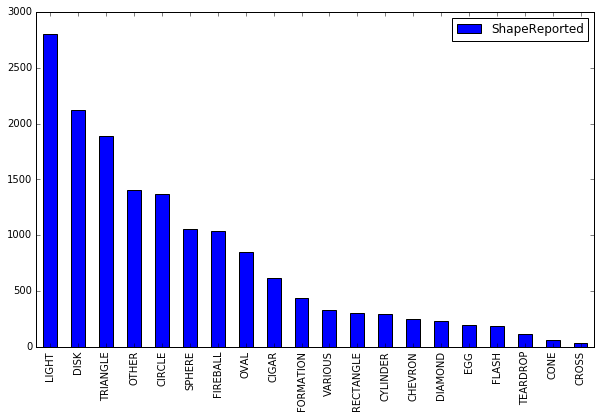

In [40]:
p = counts[:20].plot(kind = "bar", legend=True)

In [41]:
# what if you want to save it to a file?
#p.figure.savefig("path/to/somefilename.pdf/png/jpg", format=some_format)

I like the "fireball"! Sounds like d&d... How are these spotting distributed geographically? Is it a regional thing?

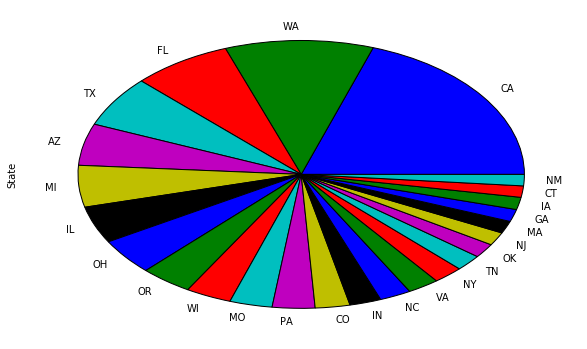

In [42]:
df[(df.ShapeReported == "FIREBALL")].State.value_counts()[:25].plot(kind="pie")

What about their chronological distribution, compared to the general trends?

In [43]:
df["ParsedTime"] = pd.to_datetime(df.Time)
df.head()

City ColorsReported ShapeReported State             Time  \
0                Ithaca            NaN      TRIANGLE    NY   6/1/1930 22:00   
1           Willingboro            NaN         OTHER    NJ  6/30/1930 20:00   
2               Holyoke            NaN          OVAL    CO  2/15/1931 14:00   
3               Abilene            NaN          DISK    KS   6/1/1931 13:00   
4  New York Worlds Fair            NaN         LIGHT    NY  4/18/1933 19:00   

                  CityState          ParsedTime  
0                Ithaca, NY 1930-06-01 22:00:00  
1           Willingboro, NJ 1930-06-30 20:00:00  
2               Holyoke, CO 1931-02-15 14:00:00  
3               Abilene, KS 1931-06-01 13:00:00  
4  New York Worlds Fair, NY 1933-04-18 19:00:00

In [44]:
df["Year"] = df.ParsedTime.dt.year
df.head()

City ColorsReported ShapeReported State             Time  \
0                Ithaca            NaN      TRIANGLE    NY   6/1/1930 22:00   
1           Willingboro            NaN         OTHER    NJ  6/30/1930 20:00   
2               Holyoke            NaN          OVAL    CO  2/15/1931 14:00   
3               Abilene            NaN          DISK    KS   6/1/1931 13:00   
4  New York Worlds Fair            NaN         LIGHT    NY  4/18/1933 19:00   

                  CityState          ParsedTime  Year  
0                Ithaca, NY 1930-06-01 22:00:00  1930  
1           Willingboro, NJ 1930-06-30 20:00:00  1930  
2               Holyoke, CO 1931-02-15 14:00:00  1931  
3               Abilene, KS 1931-06-01 13:00:00  1931  
4  New York Worlds Fair, NY 1933-04-18 19:00:00  1933

In [45]:
df.ShapeReported.value_counts().head()

LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
CIRCLE      1365
Name: ShapeReported, dtype: int64

In [46]:
def shapes_per_years(shape, d=df):
    """takes a shape returns tuple of arrays (years,counts)"""
    df_shape = d[d.ShapeReported==shape]
    counts = df_shape.Year.value_counts()
    counts.sort_index(inplace=True)
    return (counts.index, counts.values)

In [47]:
fireball = shapes_per_years("FIREBALL")
triangle = shapes_per_years("TRIANGLE")
disks = shapes_per_years("DISK")
light = shapes_per_years("LIGHT")
circle = shapes_per_years("CIRCLE")
ovals = shapes_per_years("OVAL")

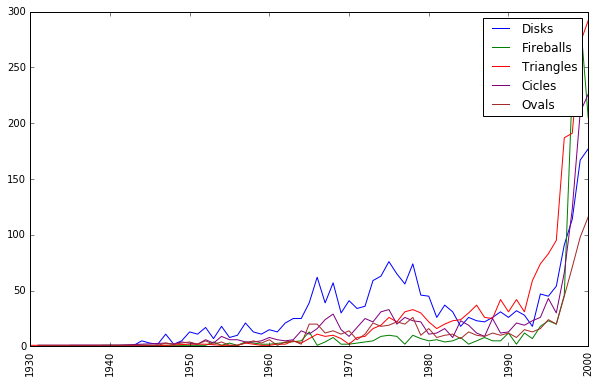

In [48]:
plt.plot(disks[0], disks[1], c="Blue", label="Disks")
plt.plot(fireball[0], fireball[1], c="Green", label="Fireballs")
plt.plot(triangle[0], triangle[1], c="Red", label="Triangles")
#plt.plot(light[0], light[1], c="Yellow", label="Lights")
plt.plot(circle[0], circle[1], c="Purple", label="Cicles")
plt.plot(ovals[0], ovals[1], c="Brown", label="Ovals")
plt.xticks(rotation="vertical")
plt.legend()

plt.show()

### More flexible, powerful (and stylish) plots

As it can be seen, `pyplot` offers you a lot of options to personalize your plots. `matplotlib` offers you also many customizables parameters to change the style of your charts, in terms of colors, labels, backgrounds and more. See [here](https://matplotlib.org/devdocs/tutorials/index.html) for some tutorials on `matplotlib`.

If you want even more, there is an even more powerful (and cool) library called [`seaborn`](http://seaborn.pydata.org/). That will really take your plots to the next level. [Here](http://seaborn.pydata.org/examples/) are some examples from the style gallery. (seaborn is a bit heavy to load, but it also comes with anaconda).

### Some examples with other numerical values

Another cool feature of pandas is that it is capable of reading data directly from the command line!

Let's work with the list of the most visited art museums in [Wikipedia](https://en.wikipedia.org/wiki/List_of_most_visited_art_museums).

Just select and copy the list (hint: start from the bottom and go up. Select also the column names, but not the first row with the table name, or you'll run into an error) 

In [174]:
most_visited_museums = pd.read_clipboard()

In [175]:
most_visited_museums.head()

Name          Country (flag), City   \
0                      Louvre                  France Paris    
1  Metropolitan Museum of Art   United States New York City    
2              British Museum         United Kingdom London    
3            National Gallery         United Kingdom London    
4             Vatican Museums     Vatican City Vatican City    

  Visitors annually  Year reported  
0         7,400,000     2016[1][2]  
1         7,006,000        2016[2]  
2         6,420,000        2016[2]  
3         6,263,000        2016[2]  
4         6,067,000        2016[2]

In [176]:
#we can save everything to a CSV file
most_visited_museums.to_csv("../../Materials-Exercises/DATA/MostVisitedMuseums.csv")

## Data from LOC API

We can now revisit the data collection and cleaning experiments that we did with the LOC JSON API. First, let us first reuse the [code](https://github.com/LibraryOfCongress/data-exploration/blob/master/LOC.gov%20JSON%20API.ipynb) to download the data.

We start with one example from the collection that is used as example, and we start by working with the first datasets returned. We'll take care of downloading the whole collection later on.

### Get some sample data

In [49]:
import requests

In [50]:
wwi_sheet_music = requests.get("https://www.loc.gov/collections/world-war-i-sheet-music/?fo=json").json()

In [51]:
wwi_sheet_music["results"][0]

{'access_restricted': False,
 'aka': ['http://lccn.loc.gov/2014563319',
  'http://www.loc.gov/item/2014563319/',
  'http://lcweb2.loc.gov/diglib/ihas/loc.natlib.ihas.200205951/',
  'http://lcweb2.loc.gov/diglib/ihas/loc.natlib.ihas.200205951/default.html',
  'http://hdl.loc.gov/loc.natlib/ihas.200205951',
  'http://memory.loc.gov/cgi-bin/query/r?ammem/AMALL:@field(NUMBER+@band(ihas+200205951))',
  'http://www.loc.gov/item/ihas.200205951/',
  'http://www.loc.gov/resource/ihas.200205951.0/',
  'http://www.loc.gov/item/ihas.200205951',
  'http://www.loc.gov/resource/ihas.200205951',
  'http://memory.loc.gov/cgi-bin/query/r?ammem/AMALL:@field(NUMBER+@band(ihas+200205951))'],
 'campaigns': [],
 'contributor': ['joseph kadell', 'kadell, joseph'],
 'date': '1919',
 'dates': ['1919-01-01T00:00:00Z'],
 'description': ['Notated Music. print | 1 score (3 pages) ; 31 cm | by Joseph Kadell. (Statement Of Responsibility). For voice and piano. Also available in digital form on the Library of Congress

In [52]:
for k in wwi_sheet_music["results"][0].keys(): print(k)

index
id
site
image_url
hassegments
timestamp
segments
access_restricted
partof
url
date
group
shelf_id
language
item_id
campaigns
original_format
mime_type
contributor
description
aka
other_title
title
location
online_format
extract_timestamp
subject
dates
digitized


The good news is that pandas can work with JSON! The bad news is that, pretty much as you saw with OpenRefine, JSON might be hard to turn into a table structure. For one thing, JSON might nest data quite deeply, and lists of values are quite frequent. Tables, which are built around the mantra of: "one row per datapoint", don't like lists as cell data...

In [53]:
import json
j = json.dumps(wwi_sheet_music["results"])

In [54]:
df = pd.read_json(j)

In [55]:
df.head()

access_restricted                                                aka  \
0             False  [http://lccn.loc.gov/2014563319, http://www.lo...   
1             False  [http://lccn.loc.gov/2014561316, http://www.lo...   
2             False  [http://lccn.loc.gov/2014563320, http://www.lo...   
3             False  [http://lccn.loc.gov/2014563321, http://www.lo...   
4             False  [http://lccn.loc.gov/2014563322, http://www.lo...   

  campaigns                                        contributor  date  \
0        []                    [joseph kadell, kadell, joseph]  1919   
1        []                [richard, hector, wood, raymond h.]  1920   
2        []              [delmar music co., kaderabek, adolph]  1919   
3        []              [legters music co., kadow, mabel may]  1919   
4        []  [ehrgott & kahl, kahl, a. f., ehrgott, chas. (...  1918   

                    dates                                        description  \
0  [1919-01-01T00:00:00Z]  [Notated Music. print | 1 score (3 pages) ; 31...   
1  [1920-01-01T00:00:00Z]  [Notated Music. print | Chicago 1 scoLegters M...   
2  [1919-01-01T00:00:00Z]  [Notated Music. print | 1 score (3 unnumbered ...   
3  [1919-01-01T00:00:00Z]  [Notated Music. print | 1 score (3 unnumbered ...   
4  [1918-01-01T00:00:00Z]  [Notated Music. print | 1 score (3 pages) ; 35...   

  digitized            extract_timestamp  \
0      True  2017-03-15T17:03:48.602000Z   
1      True  2017-03-15T17:03:59.644000Z   
2      True  2017-03-15T17:03:49.264000Z   
3      True  2017-03-15T17:03:49.264000Z   
4      True  2017-03-15T17:03:49.264000Z   

                                  group                  ...                   \
0  [ihas/mets, catalog, performingarts]                  ...                    
1  [ihas/mets, catalog, performingarts]                  ...                    
2  [ihas/mets, catalog, performingarts]                  ...                    
3  [ihas/mets, catalog, performingarts]                  ...                    
4  [ihas/mets, catalog, performingarts]                  ...                    

   original_format other_title  \
0  [notated music]          []   
1  [notated music]          []   
2  [notated music]          []   
3  [notated music]          []   
4  [notated music]          []   

                                              partof  \
0  [the library of congress celebrates the songs ...   
1  [the library of congress celebrates the songs ...   
2  [the library of congress celebrates the songs ...   
3  [the library of congress celebrates the songs ...   
4  [the library of congress celebrates the songs ...   

                                            segments shelf_id  \
0  [{'count': 4, 'url': 'https://www.loc.gov/reso...    M1646   
1  [{'count': 4, 'url': 'https://www.loc.gov/reso...    M1646   
2  [{'count': 4, 'url': 'https://www.loc.gov/reso...    M1646   
3  [{'count': 4, 'url': 'https://www.loc.gov/reso...    M1646   
4  [{'count': 4, 'url': 'https://www.loc.gov/reso...    M1646   

                        site  \
0  [performingarts, catalog]   
1  [performingarts, catalog]   
2  [performingarts, catalog]   
3  [performingarts, catalog]   
4  [performingarts, catalog]   

                                             subject               timestamp  \
0  [popular music, world war, notated music, unit... 2017-10-13 19:05:24.149   
1  [popular music, world war, notated music, unit... 2017-10-13 19:07:36.413   
2  [popular music, world war, notated music, unit... 2017-10-13 19:05:34.207   
3  [popular music, world war, notated music, unit... 2017-10-13 19:05:34.207   
4  [popular music, world war, notated music, unit... 2017-10-13 19:05:34.207   

                             title                                   url  
0                       Our heroes  https://www.loc.gov/item/2014563319/  
1   The  Kaiser has no place to go  https://www.loc.gov/item/2014561316/  
2                    Sailor's life  https://www.loc.gov/ite

### Download the full data

So, it is possible to load the data into a more or less decent dataframe! Right now, before we clean it, let us download the full data. Like that our experiment will have a more real-life flavor...

We will write a function that implements the logic of the LOC Notebook (the pseudo-infinite while loop). You can copy-paste it and add it to your code!

In [70]:
def get_full_collection_data(url):
    """Crawl a digital collection of the LOC and returns all the records
    in a list of json elements
    """
    results = []
    j = requests.get(url).json()
    while True:
        print("Working with results: {} (len = {})".format(j["pagination"]["results"], len(results)))
        results = results + j["results"]
        next_page = j["pagination"]["next"] #get the next page url
        if next_page is not None: #make sure we haven't hit the end of the pages
            j = requests.get(next_page).json()
        else:
            break #we are done and can stop looping     
    return results

In [64]:
def get_n_datapoints(url, n=1000):
    """Same as get_full_collection_data, but stops after n elements
    """
    results = []
    j = requests.get(url).json()
    while len(results) <= n:
        print("Working with results: {} (len = {})".format(j["pagination"]["results"], len(results)))
        results = results + j["results"]
        next_page = j["pagination"]["next"] #get the next page url
        if next_page is not None: #make sure we haven't hit the end of the pages
            j = requests.get(next_page).json()
        else:
            break #we are done and can stop looping     
    return results

In [65]:
def loc_json_to_df(results):
    """Converts the list of JSON results from the LOC API
    into a coarse pandas dataframe, ready for data cleaning
    """
    j = json.dumps(results)
    return pd.read_json(j) 

In [67]:
n_res = get_n_datapoints("https://www.loc.gov/collections/world-war-i-sheet-music?fo=json&c=100")

Working with results: 1 - 100 (len = 0)
Working with results: 101 - 200 (len = 100)
Working with results: 201 - 300 (len = 200)
Working with results: 301 - 400 (len = 300)
Working with results: 401 - 500 (len = 400)
Working with results: 501 - 600 (len = 500)
Working with results: 601 - 700 (len = 600)
Working with results: 701 - 800 (len = 700)
Working with results: 801 - 900 (len = 800)
Working with results: 901 - 1000 (len = 900)
Working with results: 1001 - 1100 (len = 1000)


In [68]:
ex = loc_json_to_df(n_res)

In [71]:
results = get_full_collection_data("https://www.loc.gov/collections/world-war-i-sheet-music?fo=json&c=150")

Working with results: 1 - 150 (len = 0)
Working with results: 151 - 300 (len = 150)
Working with results: 301 - 450 (len = 300)
Working with results: 451 - 600 (len = 450)
Working with results: 601 - 750 (len = 600)
Working with results: 751 - 900 (len = 750)
Working with results: 901 - 1050 (len = 900)
Working with results: 1051 - 1200 (len = 1050)
Working with results: 1201 - 1350 (len = 1200)
Working with results: 1351 - 1500 (len = 1350)
Working with results: 1501 - 1650 (len = 1500)
Working with results: 1651 - 1800 (len = 1650)
Working with results: 1801 - 1950 (len = 1800)
Working with results: 1951 - 2100 (len = 1950)
Working with results: 2101 - 2250 (len = 2100)
Working with results: 2251 - 2400 (len = 2250)
Working with results: 2401 - 2550 (len = 2400)
Working with results: 2551 - 2700 (len = 2550)
Working with results: 2701 - 2850 (len = 2700)
Working with results: 2851 - 3000 (len = 2850)
Working with results: 3001 - 3150 (len = 3000)
Working with results: 3151 - 3300 (le

In [72]:
len(results)

13507

In [73]:
df = loc_json_to_df(results)

In [74]:
df.head()

access_restricted                                                aka  \
0             False  [http://lccn.loc.gov/2014563319, http://www.lo...   
1             False  [http://lccn.loc.gov/2014561316, http://www.lo...   
2             False  [http://lccn.loc.gov/2014563320, http://www.lo...   
3             False  [http://lccn.loc.gov/2014563321, http://www.lo...   
4             False  [http://lccn.loc.gov/2014563322, http://www.lo...   

  campaigns                                        contributor  count  \
0        []                    [joseph kadell, kadell, joseph]    NaN   
1        []                [richard, hector, wood, raymond h.]    NaN   
2        []              [delmar music co., kaderabek, adolph]    NaN   
3        []              [legters music co., kadow, mabel may]    NaN   
4        []  [ehrgott & kahl, kahl, a. f., ehrgott, chas. (...    NaN   

                 date                   dates  \
0 1970-01-01 00:31:59  [1919-01-01T00:00:00Z]   
1 1970-01-01 00:32:00  [1920-01-01T00:00:00Z]   
2 1970-01-01 00:31:59  [1919-01-01T00:00:00Z]   
3 1970-01-01 00:31:59  [1919-01-01T00:00:00Z]   
4 1970-01-01 00:31:58  [1918-01-01T00:00:00Z]   

                                         description digitized  \
0  [Notated Music. print | 1 score (3 pages) ; 31...      True   
1  [Notated Music. print | Chicago 1 scoLegters M...      True   
2  [Notated Music. print | 1 score (3 unnumbered ...      True   
3  [Notated Music. print | 1 score (3 unnumbered ...      True   
4  [Notated Music. print | 1 score (3 pages) ; 35...      True   

             extract_timestamp                  ...                   \
0  2017-03-15T17:03:48.602000Z                  ...                    
1  2017-03-15T17:03:59.644000Z                  ...                    
2  2017-03-15T17:03:49.264000Z                  ...                    
3  2017-03-15T17:03:49.264000Z                  ...                    
4  2017-03-15T17:03:49.264000Z                  ...                    

   original_format other_title  \
0  [notated music]          []   
1  [notated music]          []   
2  [notated music]          []   
3  [notated music]          []   
4  [notated music]          []   

                                              partof  \
0  [the library of congress celebrates the songs ...   
1  [the library of congress celebrates the songs ...   
2  [the library of congress celebrates the songs ...   
3  [the library of congress celebrates the songs ...   
4  [the library of congress celebrates the songs ...   

                                            segments  shelf_id  \
0  [{'count': 4, 'url': 'https://www.loc.gov/reso...     M1646   
1  [{'count': 4, 'url': 'https://www.loc.gov/reso...     M1646   
2  [{'count': 4, 'url': 'https://www.loc.gov/reso...     M1646   
3  [{'count': 4, 'url': 'https://www.loc.gov/reso...     M1646   
4  [{'count': 4, 'url': 'https://www.loc.gov/reso...     M1646   

                        site  \
0  [performingarts, catalog]   
1  [performingarts, catalog]   
2  [performingarts, catalog]   
3  [performingarts, catalog]   
4  [performingarts, catalog]   

                                             subject               timestamp  \
0  [popular music, world war, notated music, unit... 2017-10-13 19:05:24.149   
1  [popular music, world war, notated music, unit... 2017-10-13 19:07:36.413   
2  [popular music, world war, notated music, unit... 2017-10-13 19:05:34.207   
3  [popular music, world war, notated music, unit... 2017-10-13 19:05:34.207   
4  [popular music, world war, notated music, unit... 2017-10-13 19:05:34.207   

                             title                                   url  
0                       Our heroes  https://www.loc.gov/item/2014563319/  
1   The  Kaiser has no place to go  https://www.loc.gov/item/2014561316/  
2                    Sailor's life  https://www.loc.gov/item/2014563320/  
3  For the boys who did not return  https://www.loc.gov/item/2014563321/  
4    

Let us save this behemoth to a CSV file!

In [76]:
df.to_csv("/home/francesco/Desktop/WWI_Sheets.tsv", sep="\t")

### Some data cleaning

In [77]:
df.columns

Index(['access_restricted', 'aka', 'campaigns', 'contributor', 'count', 'date',
       'dates', 'description', 'digitized', 'extract_timestamp', 'group',
       'hassegments', 'id', 'image_url', 'index', 'item_id', 'items',
       'language', 'location', 'mime_type', 'online_format', 'original_format',
       'other_title', 'partof', 'segments', 'shelf_id', 'site', 'subject',
       'timestamp', 'title', 'url'],
      dtype='object')

In [78]:
df.set_index("item_id" , drop=False, inplace=True)
df.head()
df = df[["title", "contributor", "date", "location", "other_title", 'original_format', 'description',
         'subject', "language", "partof", 'image_url', "url"]]

In [79]:
df.head()

title  \
item_id                                        
2014563319/                       Our heroes   
2014561316/   The  Kaiser has no place to go   
2014563320/                    Sailor's life   
2014563321/  For the boys who did not return   
2014563322/    The  parting sailor boy's vow   

                                                   contributor  \
item_id                                                          
2014563319/                    [joseph kadell, kadell, joseph]   
2014561316/                [richard, hector, wood, raymond h.]   
2014563320/              [delmar music co., kaderabek, adolph]   
2014563321/              [legters music co., kadow, mabel may]   
2014563322/  [ehrgott & kahl, kahl, a. f., ehrgott, chas. (...   

                           date                                 location  \
item_id                                                                    
2014563319/ 1970-01-01 00:31:59      [united states, brooklyn, new york]   
2014561316/ 1970-01-01 00:32:00                [united states, illinois]   
2014563320/ 1970-01-01 00:31:59       [united states, chicago, illinois]   
2014563321/ 1970-01-01 00:31:59       [united states, chicago, illinois]   
2014563322/ 1970-01-01 00:31:58  [united states, new york, union square]   

            other_title  original_format  \
item_id                                    
2014563319/          []  [notated music]   
2014561316/          []  [notated music]   
2014563320/          []  [notated music]   
2014563321/          []  [notated music]   
2014563322/          []  [notated music]   

                                                   description  \
item_id                                                          
2014563319/  [Notated Music. print | 1 score (3 pages) ; 31...   
2014561316/  [Notated Music. print | Chicago 1 scoLegters M...   
2014563320/  [Notated Music. print | 1 score (3 unnumbered ...   
2014563321/  [Notated Music. print | 1 score (3 unnumbered ...   
2014563322/  [Notated Music. print | 1 score (3 pages) ; 35...   

                                                       subject   language  \
item_id                                                                     
2014563319/  [popular music, world war, notated music, unit...  [english]   
2014561316/  [popular music, world war, notated music, unit...  [english]   
2014563320/  [popular music, world war, notated music, unit...  [english]   
2014563321/  [popular music, world war, notated music, unit...  [english]   
2014563322/  [popular music, world war, notated music, unit...  [english]   

                                                        partof  \
item_id                                                          
2014563319/  [the library of congress celebrates the songs ...   
2014561316/  [the library of congress celebrates the songs ...   
2014563320/  [the library of congress celebrates the songs ...   
2014563321/  [the library of congress celebrates the songs ...   
2014563322/  [the library of congress celebrates the songs ...   

                                                     image_url  \
item_id                                                          
2014563319/  [//lcweb2.loc.gov/diglib/media/loc.natlib.ihas...   
2014561316/  [//lcweb2.loc.gov/diglib/media/loc.natlib.ihas...   
2014563320/  [//lcweb2.loc.gov/diglib/media/loc.natlib.ihas...   
2014563321/  [//lcweb2.loc.gov/diglib/media/loc.natlib.ihas...   
2014563322/  [//lcweb2.loc.gov/diglib/media/loc.natlib.ihas...   

                                              url  
item_id                                            
2014563319/  https://www.loc.gov/item/2014563319/  
2014561316/  https://www.loc.gov/item/2014561316/  
2014563320/  https://www.loc.gov/item/2014563320/  
2014563321/  https://www.loc.gov/item/2014563321/  
2014563322/  https://www.loc.gov/item/2014563322/

In [80]:
df.index = df.index.str.strip("/")
df.head()

title  \
item_id                                       
2014563319                       Our heroes   
2014561316   The  Kaiser has no place to go   
2014563320                    Sailor's life   
2014563321  For the boys who did not return   
2014563322    The  parting sailor boy's vow   

                                                  contributor  \
item_id                                                         
2014563319                    [joseph kadell, kadell, joseph]   
2014561316                [richard, hector, wood, raymond h.]   
2014563320              [delmar music co., kaderabek, adolph]   
2014563321              [legters music co., kadow, mabel may]   
2014563322  [ehrgott & kahl, kahl, a. f., ehrgott, chas. (...   

                          date                                 location  \
item_id                                                                   
2014563319 1970-01-01 00:31:59      [united states, brooklyn, new york]   
2014561316 1970-01-01 00:32:00                [united states, illinois]   
2014563320 1970-01-01 00:31:59       [united states, chicago, illinois]   
2014563321 1970-01-01 00:31:59       [united states, chicago, illinois]   
2014563322 1970-01-01 00:31:58  [united states, new york, union square]   

           other_title  original_format  \
item_id                                   
2014563319          []  [notated music]   
2014561316          []  [notated music]   
2014563320          []  [notated music]   
2014563321          []  [notated music]   
2014563322          []  [notated music]   

                                                  description  \
item_id                                                         
2014563319  [Notated Music. print | 1 score (3 pages) ; 31...   
2014561316  [Notated Music. print | Chicago 1 scoLegters M...   
2014563320  [Notated Music. print | 1 score (3 unnumbered ...   
2014563321  [Notated Music. print | 1 score (3 unnumbered ...   
2014563322  [Notated Music. print | 1 score (3 pages) ; 35...   

                                                      subject   language  \
item_id                                                                    
2014563319  [popular music, world war, notated music, unit...  [english]   
2014561316  [popular music, world war, notated music, unit...  [english]   
2014563320  [popular music, world war, notated music, unit...  [english]   
2014563321  [popular music, world war, notated music, unit...  [english]   
2014563322  [popular music, world war, notated music, unit...  [english]   

                                                       partof  \
item_id                                                         
2014563319  [the library of congress celebrates the songs ...   
2014561316  [the library of congress celebrates the songs ...   
2014563320  [the library of congress celebrates the songs ...   
2014563321  [the library of congress celebrates the songs ...   
2014563322  [the library of congress celebrates the songs ...   

                                                    image_url  \
item_id                                                         
2014563319  [//lcweb2.loc.gov/diglib/media/loc.natlib.ihas...   
2014561316  [//lcweb2.loc.gov/diglib/media/loc.natlib.ihas...   
2014563320  [//lcweb2.loc.gov/diglib/media/loc.natlib.ihas...   
2014563321  [//lcweb2.loc.gov/diglib/media/loc.natlib.ihas...   
2014563322  [//lcweb2.loc.gov/diglib/media/loc.natlib.ihas...   

                                             url  
item_id                                           
2014563319  https://www.loc.gov/item/2014563319/  
2014561316  https://www.loc.gov/item/2014561316/  
2014563320  https://www.loc.gov/item/2014563320/  
2014563321  https://www.loc.gov/item/2014563321/  
2014563322  https://www.loc.gov/item/2014563322/

In [89]:
s = df.subject.apply(frozenset).to_frame(name='subject')
for sub in frozenset.union(*s.subject):
    df[sub] = s.apply(lambda _: int(sub in _.subject), axis=1)

In [90]:
df.head()

title  \
item_id                                       
2014563319                       Our heroes   
2014561316   The  Kaiser has no place to go   
2014563320                    Sailor's life   
2014563321  For the boys who did not return   
2014563322    The  parting sailor boy's vow   

                                                  contributor  date  \
item_id                                                               
2014563319                    [joseph kadell, kadell, joseph]  1919   
2014561316                [richard, hector, wood, raymond h.]  1920   
2014563320              [delmar music co., kaderabek, adolph]  1919   
2014563321              [legters music co., kadow, mabel may]  1919   
2014563322  [ehrgott & kahl, kahl, a. f., ehrgott, chas. (...  1918   

                                           location other_title  \
item_id                                                           
2014563319      [united states, brooklyn, new york]          []   
2014561316                [united states, illinois]          []   
2014563320       [united states, chicago, illinois]          []   
2014563321       [united states, chicago, illinois]          []   
2014563322  [united states, new york, union square]          []   

            original_format  \
item_id                       
2014563319  [notated music]   
2014561316  [notated music]   
2014563320  [notated music]   
2014563321  [notated music]   
2014563322  [notated music]   

                                                  description  \
item_id                                                         
2014563319  [Notated Music. print | 1 score (3 pages) ; 31...   
2014561316  [Notated Music. print | Chicago 1 scoLegters M...   
2014563320  [Notated Music. print | 1 score (3 unnumbered ...   
2014563321  [Notated Music. print | 1 score (3 unnumbered ...   
2014563322  [Notated Music. print | 1 score (3 pages) ; 35...   

                                                      subject   language  \
item_id                                                                    
2014563319  [popular music, world war, notated music, unit...  [english]   
2014561316  [popular music, world war, notated music, unit...  [english]   
2014563320  [popular music, world war, notated music, unit...  [english]   
2014563321  [popular music, world war, notated music, unit...  [english]   
2014563322  [popular music, world war, notated music, unit...  [english]   

                                                       partof      ...        \
item_id                                                            ...         
2014563319  [the library of congress celebrates the songs ...      ...         
2014561316  [the library of congress celebrates the songs ...      ...         
2014563320  [the library of congress celebrates the songs ...      ...         
2014563321  [the library of congress celebrates the songs ...      ...         
2014563322  [the library of congress celebrates the songs ...      ...         

           william ii, german emperor  german emperor  songs and music  \
item_id                                                                  
2014563319       0                  0               0                1   
2014561316       0                  0               0                1   
2014563320       0                  0               0                1   
2014563321       0                  0               0                1   
2014563322       0                  0               0                1   

            uncle sam (symbolic character)  world war  ii  united states  \
item_id                                                                    
2014563319                               0          1   0              1   
2014561316                               0          1   0              1   
2014563320                               0          1   0              1   
2014563321                               0          1   0              1 

In [97]:
newdf = df[pd.notnull(df.index)]
len(newdf)

13440

In [98]:
import re
reg = re.compile(r'(united states|u\.s\.a\.), ?')
newdf["location_edit"] = newdf.location.apply(lambda x : ", ".join(x))
newdf["location_edit"] = newdf.location_edit.apply(lambda x : reg.sub("", x))
newdf[["title","location", "location_edit"]].head()

/home/francesco/.virtualenvs/py3env/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/francesco/.virtualenvs/py3env/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


title  \
item_id                                       
2014563319                       Our heroes   
2014561316   The  Kaiser has no place to go   
2014563320                    Sailor's life   
2014563321  For the boys who did not return   
2014563322    The  parting sailor boy's vow   

                                           location           location_edit  
item_id                                                                      
2014563319      [united states, brooklyn, new york]      brooklyn, new york  
2014561316                [united states, illinois]                illinois  
2014563320       [united states, chicago, illinois]       chicago, illinois  
2014563321       [united states, chicago, illinois]       chicago, illinois  
2014563322  [united states, new york, union square]  new york, union square

In [105]:
newdf.iloc[1000:1010][["title","location", "location_edit"]]

title  \
item_id                                                         
2013570922                   Every girlie loves a soldier boy   
2013570923  I'll say good luck, God bless you, but I canno...   
2013570924                         Hurrah for Wilson's braves   
2013570925  A  bondman in the land of liberty let's all be...   
2013570926                 The  flag that has saved the world   
2013570927  Good-bye boys come back soon and bring back ho...   
2013570928                       Every town is your home town   
2013570929  I won't be in line when the boys come home (th...   
2013570930                       Every town is your home town   
2013570931                       Every town is your home town   

                                                     location  \
item_id                                                         
2013570922  [united states, no place, unknown, or undeterm...   
2013570923  [united states, no place, unknown, or undeterm...   
2013570924                   [washington d.c., united states]   
2013570925  [united states, no place, unknown, or undeterm...   
2013570926  [united states, no place, unknown, or undeterm...   
2013570927                [united states, brooklyn, new york]   
2013570928     [no place, unknown, or undetermined, new york]   
2013570929  [united states, no place, unknown, or undeterm...   
2013570930     [no place, unknown, or undetermined, new york]   
2013570931                                    [united states]   

                                                location_edit  
item_id                                                        
2013570922                 no place, unknown, or undetermined  
2013570923                 no place, unknown, or undetermined  
2013570924                     washington d.c., united states  
2013570925       no place, unknown, or undetermined, brooklyn  
2013570926  no place, unknown, or undetermined, place of p...  
2013570927                                 brooklyn, new york  
2013570928       no place, unknown, or undetermined, new york  
2013570929       no place, unknown, or undetermined, brooklyn  
2013570930       no place, unknown, or undetermined, new york  
2013570931                                      united states